In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.random as nprd
import numpy.linalg as npla
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("Replaced_label.csv")
df['growth'] = (- df['share_price'] + df['5'] )/ df['share_price'] * 100
df = df.drop(columns = ['1','2','3','4','5'])

### Generate train and test data sets

In [79]:
random_state = 1
df['labels'] = pd.cut(df['growth'], bins=[-np.inf,-5,5,np.inf], right=True, labels=False)
X = df.drop(columns = ['labels','date_of_priced','growth'])
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)
data_classes = ['Decrease','Maintain','Increase']

87

### Random Forest

Text(0.5, 0, 'Max Depth')

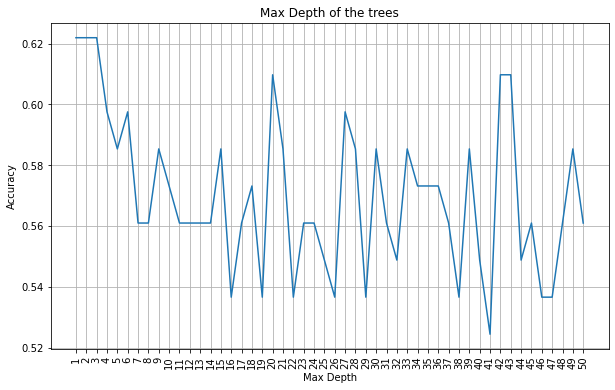

In [65]:
epoches = 50
scores = []
for idx in range(1,epoches + 1):
    clf = RFC(max_depth=idx)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test, sample_weight=None)
    scores.append(score)
fig1,ax1 = plt.subplots()
fig1.set_size_inches(10, 6)
ax1.plot(range(1,epoches + 1),scores)
ax1.set_xticks(range(1,epoches + 1))
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Max Depth of the trees")
ax1.set_ylabel("Accuracy")
ax1.grid()
ax1.set_xlabel("Max Depth")

Text(0.5, 0, 'Number of trees')

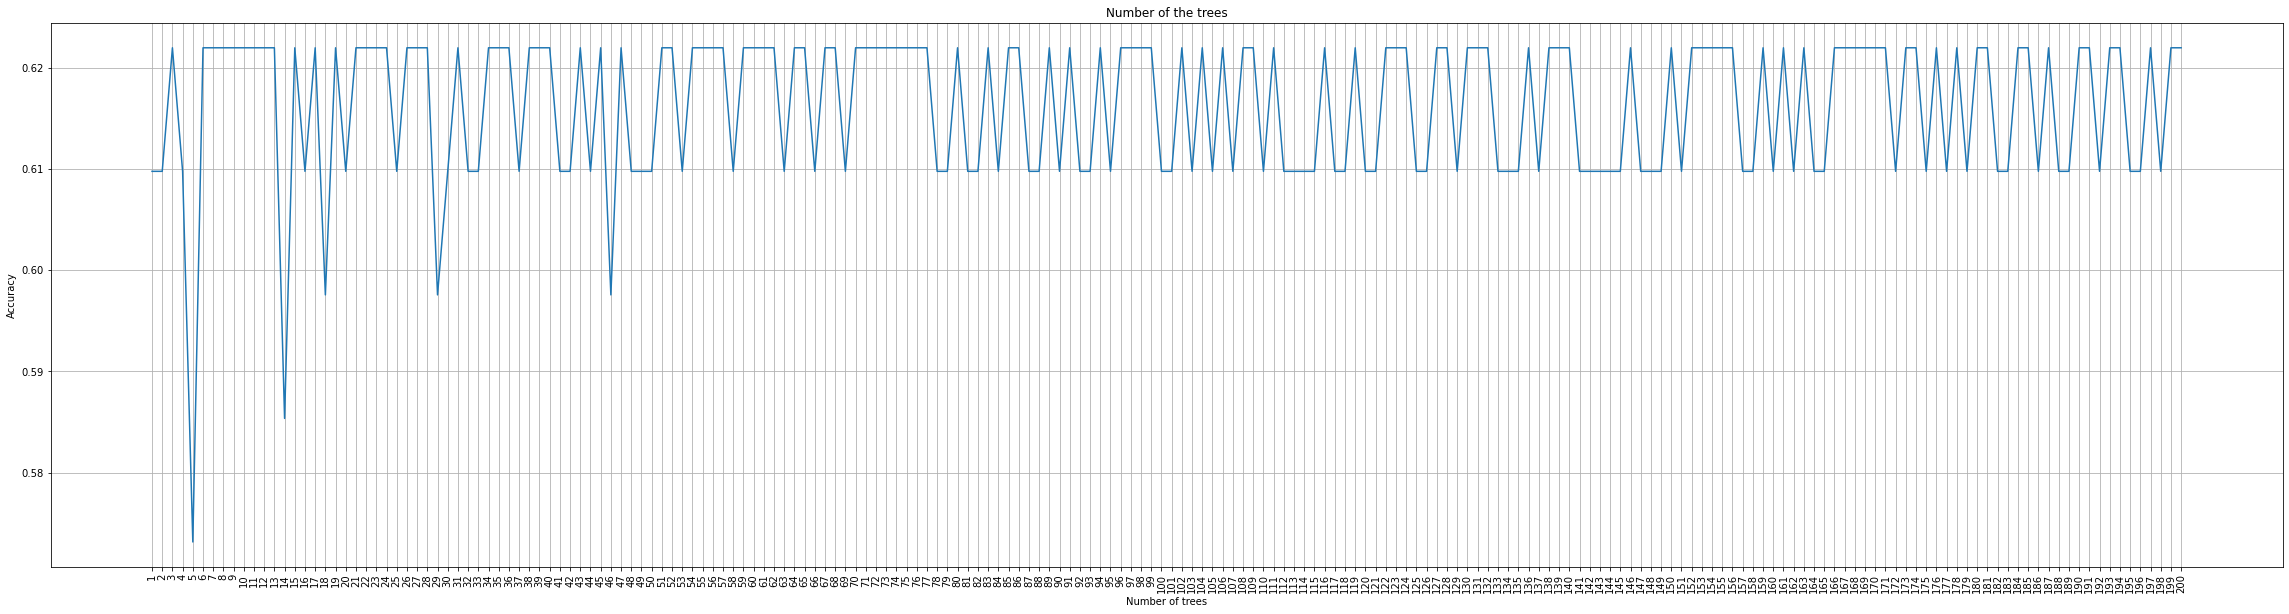

In [64]:
num_trees = 200
scores = []
for idx in range(1,num_trees + 1):
    clf = RFC(n_estimators=idx, max_depth = 2 )
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test, sample_weight=None)
    scores.append(score)
fig2,ax2 = plt.subplots()
fig2.set_size_inches(40, 10)
ax2.plot(range(1,num_trees + 1),scores)
ax2.set_xticks(range(1,num_trees + 1))
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Number of the trees")
ax2.set_ylabel("Accuracy")
ax2.grid()
ax2.set_xlabel("Number of trees")

0.6097560975609756
0.6481481481481481


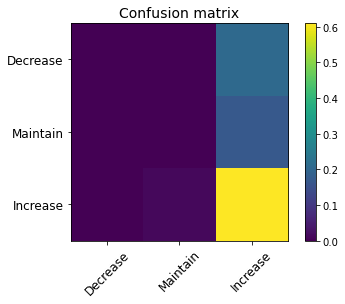

In [70]:
clf = RFC(n_estimators = 165, max_depth=3)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
plt.imshow(confusion_matrix(y_test, y_predict,normalize='all'))
plt.title('Confusion matrix', fontsize=14)
plt.colorbar()
plt.xticks(np.arange(3), data_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(3), data_classes, fontsize=12)
print(clf.score(X_test, y_test, sample_weight=None))
print(clf.score(X_train, y_train, sample_weight=None))

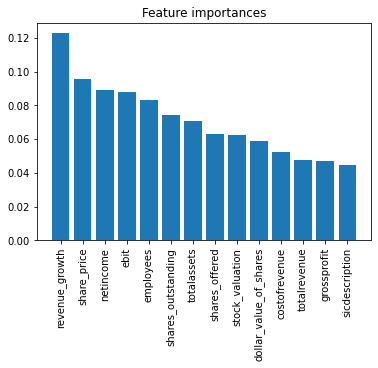

In [405]:
importance = clf.feature_importances_
label = X_train.columns
seq = np.argsort(importance)
seq = seq[: : -1]
fig, ax = plt.subplots()
ax.bar(label[seq], importance[seq])
ax.set_title("Feature importances")
ax.tick_params(axis='x', labelrotation = 90)

### SVM

[0.6097560975609756,
 0.6097560975609756,
 0.5975609756097561,
 0.5975609756097561,
 0.6097560975609756,
 0.6219512195121951,
 0.6097560975609756,
 0.6097560975609756,
 0.5975609756097561,
 0.5975609756097561,
 0.5975609756097561,
 0.5975609756097561]

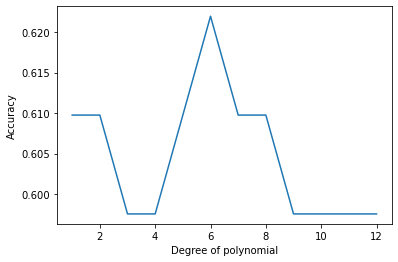

In [60]:
myDegree = 12
score=[]
for idx in range(1,myDegree+1):
    clfv = OneVsRestClassifier(SVC(C = 1,kernel='poly',degree=idx)).fit(X_train, y_train)
    myScore=clfv.score(X_test, y_test, sample_weight=None)
    score.append(myScore)
fig,ax=plt.subplots()
ax.plot(range(1,myDegree+1),score)
ax.set_xlabel("Degree of polynomial")
ax.set_ylabel("Accuracy")
score

0.6219512195121951
0.6450617283950617


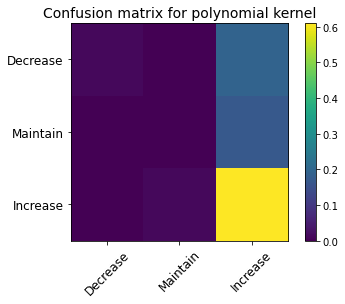

In [61]:
clfv = OneVsRestClassifier(SVC(C = 1,kernel='poly',degree=6,probability=True)).fit(X_train, y_train)
y_predict = clfv.predict(X_test)
plt.imshow(confusion_matrix(y_test, y_predict,normalize='all'))
plt.title('Confusion matrix for polynomial kernel', fontsize=14)
plt.colorbar()
plt.xticks(np.arange(3), data_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(3), data_classes, fontsize=12)
print(clfv.score(X_test, y_test, sample_weight=None))
print(clf.score(X_train, y_train, sample_weight=None))

0.6219512195121951


([<matplotlib.axis.YTick at 0x217c7ccacd0>,
 [Text(0, 0, 'Decrease'), Text(0, 1, 'Maintain'), Text(0, 2, 'Increase')])

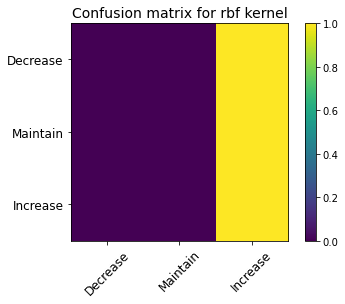

In [80]:
clfv = OneVsRestClassifier(SVC(C = 10,kernel='rbf',gamma='auto',probability = True)).fit(X_train, y_train)
print(clfv.score(X_test, y_test, sample_weight=None))
y_predict = clfv.predict(X_test)
plt.imshow(confusion_matrix(y_test, y_predict,normalize='true'))
plt.title('Confusion matrix for rbf kernel', fontsize=14)
plt.colorbar()
plt.xticks(np.arange(3), data_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(3), data_classes, fontsize=12)